<a href="https://colab.research.google.com/github/LffaZ/finalproject-housepricepred/blob/main/FP_HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Environment

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense

from tensorflow.keras.callbacks import EarlyStopping
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import zipfile
import os

## Data Accessing

In [ ]:
!kaggle datasets download -d harlfoxem/housesalesprediction

!unzip -o housesalesprediction.zip

Dataset URL: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
License(s): CC0-1.0
  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 40.3MB/s]
Archive:  housesalesprediction.zip
  inflating: kc_house_data.csv       


In [ ]:
import pandas as pd
dt = pd.read_csv('kc_house_data.csv')

In [ ]:
dt.shape

(21613, 21)

In [ ]:
dt.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dt.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
dt.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
dt.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


## Data Cleaning

### Data Formatting

In [ ]:
dt['date'] = pd.to_datetime(dt['date'], errors='coerce')

### Null Values

In [ ]:
dt.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


### Drop Duplicates

In [ ]:
print(dt.duplicated().sum())

0


## Data Exploration

In [ ]:
dt.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


### Correlation Analysis

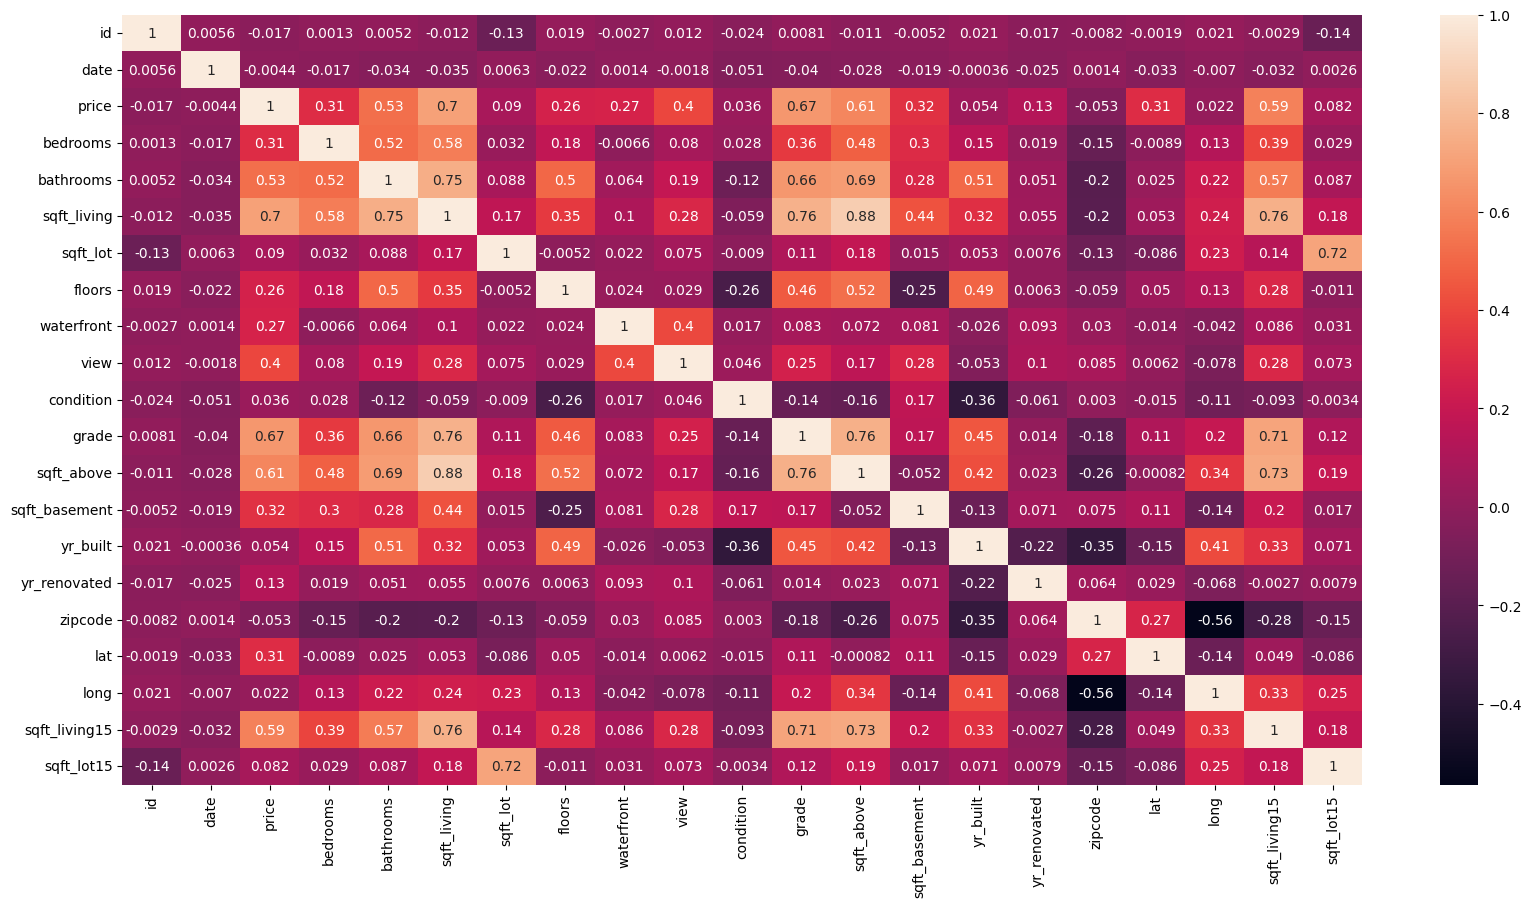

In [ ]:
corr_matrix = dt.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
corr_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


### Visualization

In [ ]:
# scatter plot
fig_scatter = px.scatter(dt, x='sqft_living', y='price',
                 title='Scatterplot of House Price vs House Area',
                 labels={'sqft_living': 'House Area (sqft)', 'price': 'House Price (USD)'})
fig_scatter.show()

# histogram
fig_price_histogram = px.histogram(dt, x='price',
                                   title='Histogram of House Price',
                                   labels={'price': 'House Price (USD)'},
                                   nbins=20)
fig_price_histogram.show()

# boxplot
fig_price_boxplot = px.box(dt, x='price',
                           title='Boxplot of House Price',
                           labels={'price': 'House Price (USD)'})
fig_price_boxplot.show()

## Feature Engineering

In [ ]:
# Feature Validation
dt = dt[
    (dt['price'] > 0) &
    (dt['bedrooms'] > 0) &
    (dt['bathrooms'] > 0) &
    (dt['sqft_living'] > 0) &
    (dt['sqft_lot'] > 0) &
    (dt['sqft_basement'] >= 0) &
    (dt['sqft_living'] <= dt['sqft_lot']) &
    (dt['floors'] > 0) &
    (dt['view'].between(0, 4)) &
    (dt['grade'].between(1, 13)) &
    (dt['yr_built'] >= 1800)
]

dt = dt[dt['waterfront'].isin([0, 1])]
dt['yr_renovated'] = dt['yr_renovated'].replace(0, pd.NA).fillna(dt['yr_built'])
dt = dt[(dt['sqft_living15'] > 0) & (dt['sqft_lot15'] > 0)]

dt.head()

<ipython-input-16-26d4902e1904>:17: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [ ]:
# New Feature: price/sqft
dt['price_per_sqft_lot'] = dt['price'] / dt['sqft_lot']

# New Feature: House size category
dt['total_sqft'] = dt['sqft_living'] + dt['sqft_basement']
bins = [0, 1000, 3000, np.inf]
labels = [1,2,3]

dt['size_category'] = pd.cut(dt['total_sqft'], bins=bins, labels=labels)
print(dt[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'total_sqft', 'size_category']].head())
print(dt[dt['size_category'] == '3'][['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'total_sqft', 'size_category']].head())


   sqft_living  sqft_lot  sqft_above  sqft_basement  total_sqft size_category
0         1180      5650        1180              0        1180             2
1         2570      7242        2170            400        2970             2
2          770     10000         770              0         770             1
3         1960      5000        1050            910        2870             2
4         1680      8080        1680              0        1680             2
Empty DataFrame
Columns: [sqft_living, sqft_lot, sqft_above, sqft_basement, total_sqft, size_category]
Index: []


### Feature Selection

In [ ]:
dt = dt.drop(columns=['id', 'date', 'lat', 'long', 'zipcode'])
dt.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_per_sqft_lot,total_sqft,size_category
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,1340,5650,39.274336,1180,2
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,74.288870,2970,2
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,2720,8062,18.000000,770,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,1360,5000,120.800000,2870,2
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,1800,7503,63.118812,1680,2


In [ ]:
dt.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'price_per_sqft_lot', 'total_sqft', 'size_category'],
      dtype='object')

## Predictive Modelling


### Split Data

In [ ]:
X = dt.drop(columns=['price'])
y = dt['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16647, 18), (4162, 18), (16647,), (4162,))

### Modelling

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
rf = RandomForestRegressor(max_depth=20, min_samples_split=2, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² (Coefficient of Determination):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


R² (Coefficient of Determination): 0.9650267504274088
Mean Squared Error (MSE): 4762454379.052535
Root Mean Squared Error (RMSE): 69010.53817390888


## Data Visualization

In [ ]:
df_comparison = pd.DataFrame({
    'Index': [i for i in range(1, len(y_test) + 1)],
    'Actual Price': y_test,
    'Prediction Price': y_pred
})
df_subset = df_comparison.iloc[:100]

# Line Plot
fig = px.line(df_subset, y=['Actual Price', 'Prediction Price'], x='Index',
              title='Actual Price vs Prediction Price',
              labels={'Index': 'Index', 'value': 'House Price (USD)'})
fig.show()